In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

filename = "C:\\Users\\simon\\OneDrive\\Escritorio\\Coding_dojp\\Datos\\Europe Hotel Booking Satisfaction Score.csv"

df = pd.read_csv(filename)

## Introduction:

The dataset contains information on hotels in Europe, with a target column reflecting customer satisfaction or dissatisfaction. 

The dataset consists of 103,904 rows and 17 columns, with both ordinal and numeric object data. The target variable is balanced and does not contain any duplicate or NaN data. 

The numerical columns are ordinal, represented on a scale from 0 to 5, with 0 being the worst and 5 being the best.


| Column Name            | Description                                                                                                                                                                                                                                                                                                                           | Range/Values                                                   |
|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|
| Age                    | Age of the traveler                                                                                                                                                                                                                                                                                                                   | 7 to 85                                                        |
| Purpose of Travel      | Reason for the travel                                                                                                                                                                                                                                                                                                                 | aviation, academic, personal, business, tourism               |
| Type of Travel         | Type of travel                                                                                                                                                                                                                                                                                                                         | Group travel, Personal Travel                                   |
| Type of Booking        | Type of booking made                                                                                                                                                                                                                                                                                                                   | Group bookings, Single/Couple                                  |
| Hotel wifi service     | Ratings given by the traveler on the quality of wifi service provided by the hotel                                                                                                                                                                                                                                                     | Ratings out of 5                                                |
| Departure/Arrival convenience | Ratings given by the traveler on the convenience of departure/arrival time                                                                                                                                                                                                                                                              | Ratings out of 5                                                |
| Ease of Online Booking  | Ratings given by the traveler on the ease of booking online                                                                                                                                                                                                                                                                             | Ratings out of 5                                                |
| Hotel Location         | Ratings given by the traveler on the location of the hotel                                                                                                                                                                                                                                                                             | Ratings out of 5                                                |
| Food and Drink         | Ratings given by the traveler on the quality of food and drink provided by the hotel                                                                                                                                                                                                                                                    | Ratings out of 5                                                |
| Stay Comfort           | Ratings given by the traveler on the comfort of the stay                                                                                                                                                                                                                                                                                | Ratings out of 5                                                |
| Common Room Entertainment | Ratings given by the traveler on the availability and quality of entertainment in the common room                                                                                                                                                                                                                                     | Ratings out of 5                                                |
| Check-in/Check-out Service | Ratings given by the traveler on the quality of the check-in/check-out service provided by the hotel                                                                                                                                                                                                                                   | Ratings out of 5                                                |
| Other Service          | Ratings given by the traveler on any other services provided by the hotel                                                                                                                                                                                                                                                              | Ratings out of 5                                                |


In [2]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [3]:
df.shape

(103904, 17)

In [4]:
df["id"].duplicated().sum()#There is not duplicated

0

In [5]:
#Row deletion

df = df.drop(columns = ["id", "Other service"])#"Id" column removed for not influencing the target
                                               #Column "service" removed for nnot knowing what kind of service
                                                

In [6]:
df.head()

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,neutral or dissatisfied
1,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,1,neutral or dissatisfied
2,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,5,satisfied
3,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,2,neutral or dissatisfied
4,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          103904 non-null  object
 1   Age                             103904 non-null  int64 
 2   purpose_of_travel               103904 non-null  object
 3   Type of Travel                  103904 non-null  object
 4   Type Of Booking                 103904 non-null  object
 5   Hotel wifi service              103904 non-null  int64 
 6   Departure/Arrival  convenience  103904 non-null  int64 
 7   Ease of Online booking          103904 non-null  int64 
 8   Hotel location                  103904 non-null  int64 
 9   Food and drink                  103904 non-null  int64 
 10  Stay comfort                    103904 non-null  int64 
 11  Common Room entertainment       103904 non-null  int64 
 12  Checkin/Checkout service      

In [8]:
df.duplicated().sum()#they exist, but we will take as coincidence

2694

In [9]:
df.isnull().sum()#No NanA values

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [10]:
#Labels per column

print("Number of labels per column")
print("==="*16)
for x in df.columns:
    print(f"{x} : {len(df[x].unique())} labels")
    print(f"{x} : {df[x].unique()} \n")

with open('output.txt', 'w') as f:
    print(df, file=f)

Number of labels per column
Gender : 2 labels
Gender : ['Male' 'Female'] 

Age : 75 labels
Age : [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 

purpose_of_travel : 5 labels
purpose_of_travel : ['aviation' 'tourism' 'business' 'academic' 'personal'] 

Type of Travel : 2 labels
Type of Travel : ['Personal Travel' 'Group Travel'] 

Type Of Booking : 3 labels
Type Of Booking : ['Not defined' 'Group bookings' 'Individual/Couple'] 

Hotel wifi service : 6 labels
Hotel wifi service : [3 2 4 1 5 0] 

Departure/Arrival  convenience : 6 labels
Departure/Arrival  convenience : [4 2 5 3 1 0] 

Ease of Online booking : 6 labels
Ease of Online booking : [3 2 5 4 1 0] 

Hotel location : 6 labels
Hotel location : [1 3 2 5 4 0] 

Food and drink : 6 labels
Food and drink : [5 1 2 4 3 0] 

Stay comfort : 6 labels
Stay comf

## Preprocessing:


The dataset is clean and does not contain any duplicate or NaN values.

The "Objective" column has been transformed to binary, with 1 representing the label we want to study.

The object columns "Gender", "purpose_of_travel", "Type of Travel", and "Type Of Booking" have been transformed to numerical values using the One hot encoder function, giving them an ordinal numerical value.

With all columns in numerical format, we only need to scale the data to reduce the high values and standard deviation.



In [11]:
#Evaluate "Type of booking" column 
#There is data "Not defined"

filtro = df["Type Of Booking"] == 'Not defined'
df_filtro = df.loc[filtro, :]

df_filtro

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,neutral or dissatisfied
11,Female,12,tourism,Personal Travel,Not defined,2,4,2,2,1,1,1,5,1,neutral or dissatisfied
27,Female,49,business,Group Travel,Not defined,4,4,4,4,2,1,4,2,2,satisfied
37,Male,40,personal,Personal Travel,Not defined,4,3,4,2,2,2,2,3,2,neutral or dissatisfied
69,Female,38,personal,Group Travel,Not defined,4,4,4,4,4,4,4,1,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103811,Male,27,personal,Group Travel,Not defined,4,4,4,4,4,4,4,3,4,neutral or dissatisfied
103867,Male,30,personal,Group Travel,Not defined,3,2,2,2,3,3,3,2,3,neutral or dissatisfied
103868,Female,57,personal,Personal Travel,Not defined,1,5,1,5,4,3,5,1,1,neutral or dissatisfied
103877,Male,27,tourism,Group Travel,Not defined,5,4,4,4,5,5,5,2,5,satisfied


In [12]:
#Display the filtered column 

print(df["Type Of Booking"].value_counts())
print(df["Type Of Booking"].value_counts(normalize= True))

#Reprecents 7.2 % of the Df
#We will remove the all the rows filtered. Is less  than 10%

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


In [13]:
#Deletion of rows
filas_eliminadas = df.index[df["Type Of Booking"] == "Not defined"].tolist()
df = df.drop(filas_eliminadas)
df = df.reset_index(drop = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96410 entries, 0 to 96409
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          96410 non-null  object
 1   Age                             96410 non-null  int64 
 2   purpose_of_travel               96410 non-null  object
 3   Type of Travel                  96410 non-null  object
 4   Type Of Booking                 96410 non-null  object
 5   Hotel wifi service              96410 non-null  int64 
 6   Departure/Arrival  convenience  96410 non-null  int64 
 7   Ease of Online booking          96410 non-null  int64 
 8   Hotel location                  96410 non-null  int64 
 9   Food and drink                  96410 non-null  int64 
 10  Stay comfort                    96410 non-null  int64 
 11  Common Room entertainment       96410 non-null  int64 
 12  Checkin/Checkout service        96410 non-null

In [14]:
df_2 = df #New Df clean

In [15]:
#Categorical change of teh target column "satisfaction"

print(df_2["satisfaction"].value_counts())
print(df_2["satisfaction"].value_counts(normalize=True))


#Variable object "Satisfied"
#label 1 satisfaction
#label 2 neutral or dissatisfied

cambio = {"neutral or dissatisfied" : 0,
         "satisfied": 1}

df_2["satisfaction"] = df_2["satisfaction"].map(cambio)



neutral or dissatisfied    53229
satisfied                  43181
Name: satisfaction, dtype: int64
neutral or dissatisfied    0.552111
satisfied                  0.447889
Name: satisfaction, dtype: float64


C:\Users\simon\AppData\Local\Temp\ipykernel_11772\779407245.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_2.corr()


<Axes: title={'center': 'Heat Map'}>

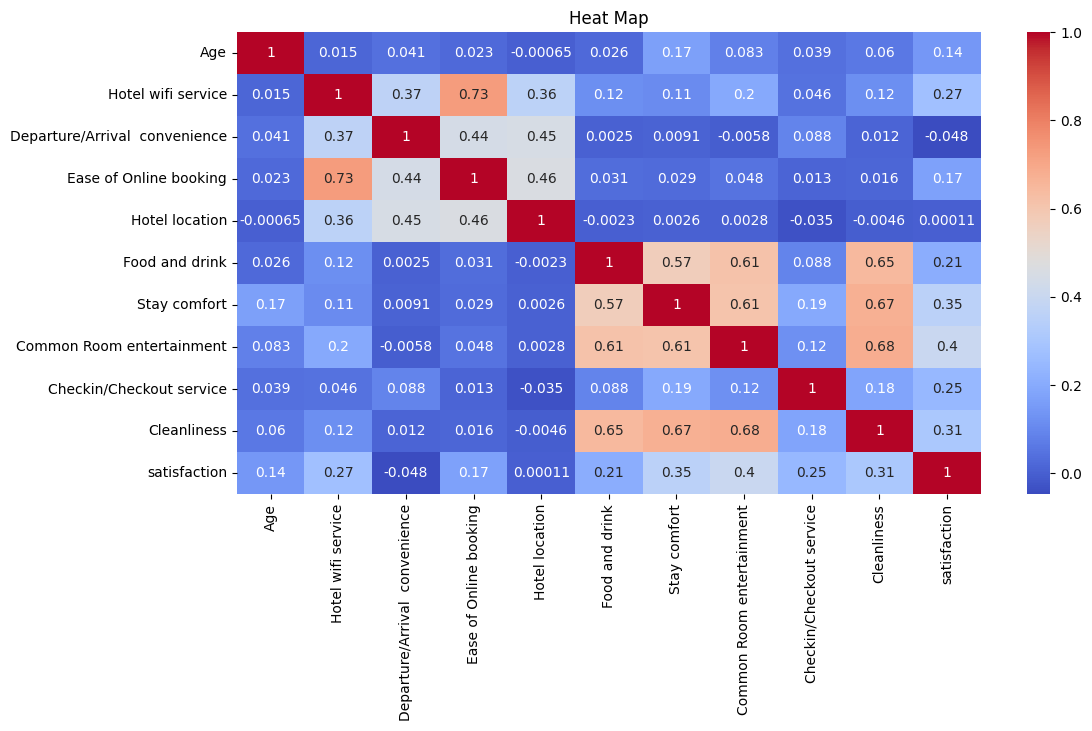

In [16]:
#Heat map of df_2

plt.figure(figsize=(12, 6))
plt.title("Heat Map")
corr_matrix = df_2.corr()
sns.heatmap(corr_matrix, annot= True, cmap= "coolwarm")

<Axes: xlabel='Type Of Booking', ylabel='count'>

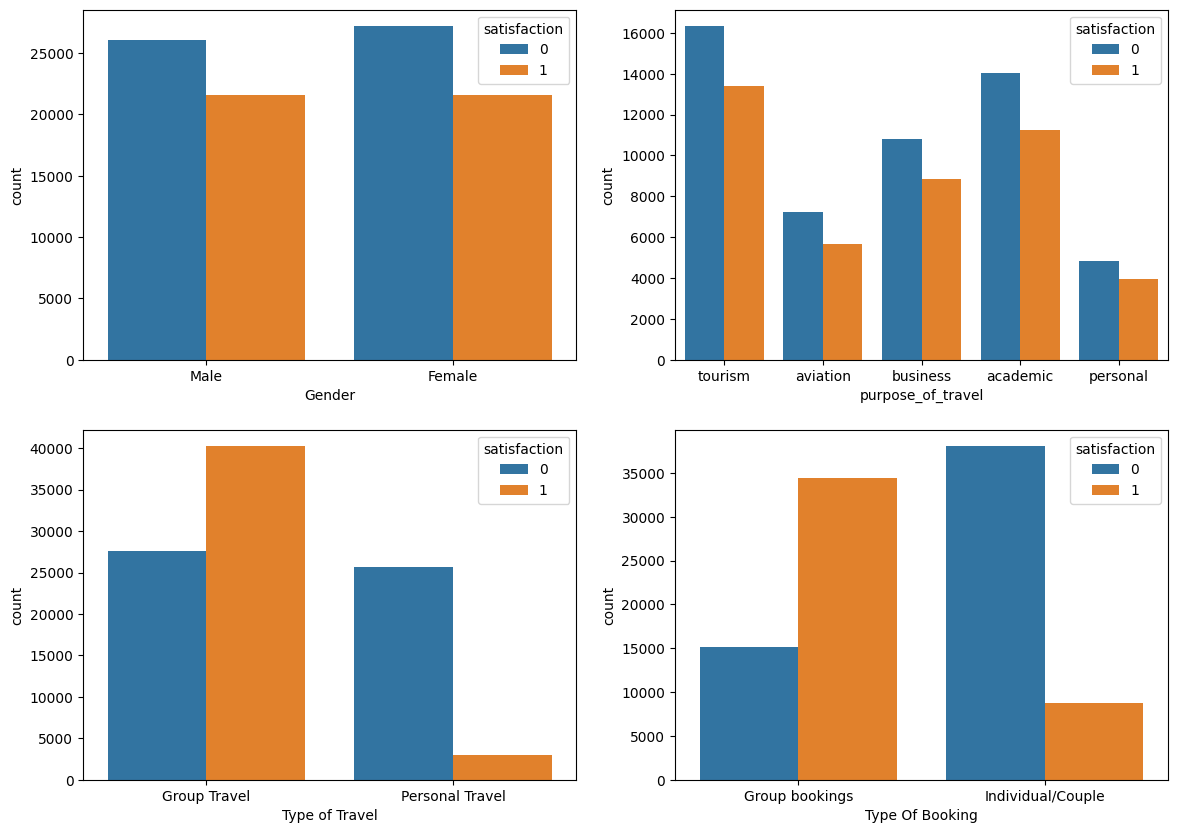

In [17]:
#Display of categorical graphs

fig, ax = plt.subplots(2,2, figsize = (14,10))
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])

## Data Analysis:

The following graph shows the level of satisfaction for each object column:

We can see that in the "Gender" column, men and women have similar levels of satisfaction.

In the "Type of Travel" and "Type of Booking" columns, we can see a relation with group travel. Satisfaction is much higher when traveling in groups compared to traveling alone or as a couple. We can assume that personal travel is related to individual or couple travel. It is important to investigate why personal travel is a less satisfying experience.

Finally, in the "Purpose of Travel" column, we see the highest levels of both satisfaction and dissatisfaction in the "Tourism" label, while the "Personal" label shows the lowest satisfaction. This is related to the fact that most trips are taken in tourist groups rather than for personal reasons. Importantly, no label shows consistently high levels of satisfaction.


In [18]:
df_2

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,1,0
1,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,5,1
2,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,2,0
3,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,1
4,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96405,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,2,0
96406,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,4,1
96407,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,4,0
96408,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,1,0


0    53229
1    43181
Name: satisfaction, dtype: int64
0    0.552111
1    0.447889
Name: satisfaction, dtype: float64


Text(0.5, 1.0, 'Distribution of Customer Satisfaction')

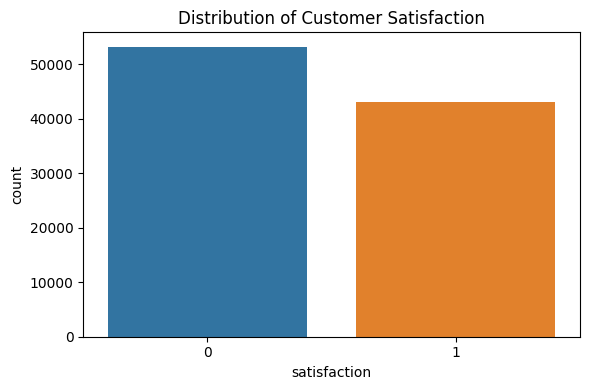

In [19]:
#Display of the target variable
print(df_2["satisfaction"].value_counts())
print(df_2["satisfaction"].value_counts(normalize= True))

plt.rcParams["figure.figsize"] = [6,4]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="satisfaction", data=df_2)
ax.set_title("Distribution of Customer Satisfaction")


#The target column is quite balanced

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96410 entries, 0 to 96409
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          96410 non-null  object
 1   Age                             96410 non-null  int64 
 2   purpose_of_travel               96410 non-null  object
 3   Type of Travel                  96410 non-null  object
 4   Type Of Booking                 96410 non-null  object
 5   Hotel wifi service              96410 non-null  int64 
 6   Departure/Arrival  convenience  96410 non-null  int64 
 7   Ease of Online booking          96410 non-null  int64 
 8   Hotel location                  96410 non-null  int64 
 9   Food and drink                  96410 non-null  int64 
 10  Stay comfort                    96410 non-null  int64 
 11  Common Room entertainment       96410 non-null  int64 
 12  Checkin/Checkout service        96410 non-null

In [21]:
df_estudio = df_2 #Df for process it

In [22]:
df_estudio

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Cleanliness,satisfaction
0,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,1,0
1,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,5,1
2,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,2,0
3,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,1
4,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96405,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,2,0
96406,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,4,1
96407,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,4,0
96408,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,1,0


## Scaling:

Our columns are numeric and object, we use ohe for the object columns and the StandardScaler for the numeric columns, we will also create pipe line for future changes


In [23]:
#Separation of the df. Target variable "Satisfaction"
#satisfied = 1
#neutral or not sitisfied = 0

y = df_estudio["satisfaction"]
X = df_estudio.drop(columns ="satisfaction")

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

In [24]:
#Select the ordinal variables
number_selector = make_column_selector(dtype_include= "number")
categoric_selector = make_column_selector(dtype_include= "object")


#Select the scaler
scaler = StandardScaler()
ohe = OneHotEncoder()

#Number pipe line
number_pipe = make_pipeline(scaler)
categoric_pipe = make_pipeline(ohe)

#We create the tuples for the transform
number_tuple = (number_pipe, number_selector)
categoric_tuple = (categoric_pipe, categoric_selector)

#pre processing
preprocessor = make_column_transformer(number_tuple,categoric_tuple,remainder= 'passthrough')

preprocessor.fit(X_train)#we do it fixed to training

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026895AFEF50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026895AE5D10>)])

In [25]:
#We make the transformation to our training and test sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

columns = preprocessor.get_feature_names_out() 
print(columns)

['pipeline-1__Age' 'pipeline-1__Hotel wifi service'
 'pipeline-1__Departure/Arrival  convenience'
 'pipeline-1__Ease of Online booking' 'pipeline-1__Hotel location'
 'pipeline-1__Food and drink' 'pipeline-1__Stay comfort'
 'pipeline-1__Common Room entertainment'
 'pipeline-1__Checkin/Checkout service' 'pipeline-1__Cleanliness'
 'pipeline-2__Gender_Female' 'pipeline-2__Gender_Male'
 'pipeline-2__purpose_of_travel_academic'
 'pipeline-2__purpose_of_travel_aviation'
 'pipeline-2__purpose_of_travel_business'
 'pipeline-2__purpose_of_travel_personal'
 'pipeline-2__purpose_of_travel_tourism'
 'pipeline-2__Type of Travel_Group Travel'
 'pipeline-2__Type of Travel_Personal Travel'
 'pipeline-2__Type Of Booking_Group bookings'
 'pipeline-2__Type Of Booking_Individual/Couple']


In [26]:
#We create a df for test a trainig 
X_train_df = pd.DataFrame(X_train_processed) 
X_train_df.columns = columns


X_test_df = pd.DataFrame(X_test_processed)
X_test_df.columns = columns
X_test_df



,pipeline-1__Age,pipeline-1__Hotel wifi service,pipeline-1__Departure/Arrival convenience,pipeline-1__Ease of Online booking,pipeline-1__Hotel location,pipeline-1__Food and drink,pipeline-1__Stay comfort,pipeline-1__Common Room entertainment,pipeline-1__Checkin/Checkout service,pipeline-1__Cleanliness,...,pipeline-2__Gender_Male,pipeline-2__purpose_of_travel_academic,pipeline-2__purpose_of_travel_aviation,pipeline-2__purpose_of_travel_business,pipeline-2__purpose_of_travel_personal,pipeline-2__purpose_of_travel_tourism,pipeline-2__Type of Travel_Group Travel,pipeline-2__Type of Travel_Personal Travel,pipeline-2__Type Of Booking_Group bookings,pipeline-2__Type Of Booking_Individual/Couple
0,1.705211,0.959185,1.280546,0.883123,-1.547320,-0.156903,-0.350807,-0.281649,1.332106,-0.229569,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.098624,-1.300428,-0.687886,-0.546334,-0.764764,0.597429,-0.350807,-1.787395,0.537152,0.535242,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.235419,0.959185,0.624402,0.883123,0.800349,0.597429,1.169286,1.224097,1.332106,-0.994380,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.836698,0.205981,-0.031742,0.168395,0.017793,-0.911234,0.409240,1.224097,0.537152,-0.229569,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.435845,0.205981,-0.031742,1.597852,0.017793,-0.156903,1.169286,-0.281649,0.537152,0.535242,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,0.502654,0.205981,1.280546,0.883123,-1.547320,1.351761,0.409240,-1.034522,-0.257802,1.300053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
24099,-0.365859,1.712390,1.280546,1.597852,1.582905,-0.911234,0.409240,0.471224,-0.257802,0.535242,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
24100,0.369037,-0.547223,0.624402,-0.546334,0.017793,-1.665566,-1.870900,-1.787395,0.537152,-1.759191,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
24101,1.037124,0.959185,0.624402,0.883123,0.800349,0.597429,1.169286,-0.281649,1.332106,-0.229569,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Modeling

We will evaluate with these 4 models:
- Logistic regression
- Decision tree, in order to discover non-linear data
- Random forest
- Neural Network


<Axes: title={'center': 'Scaled heat map'}>

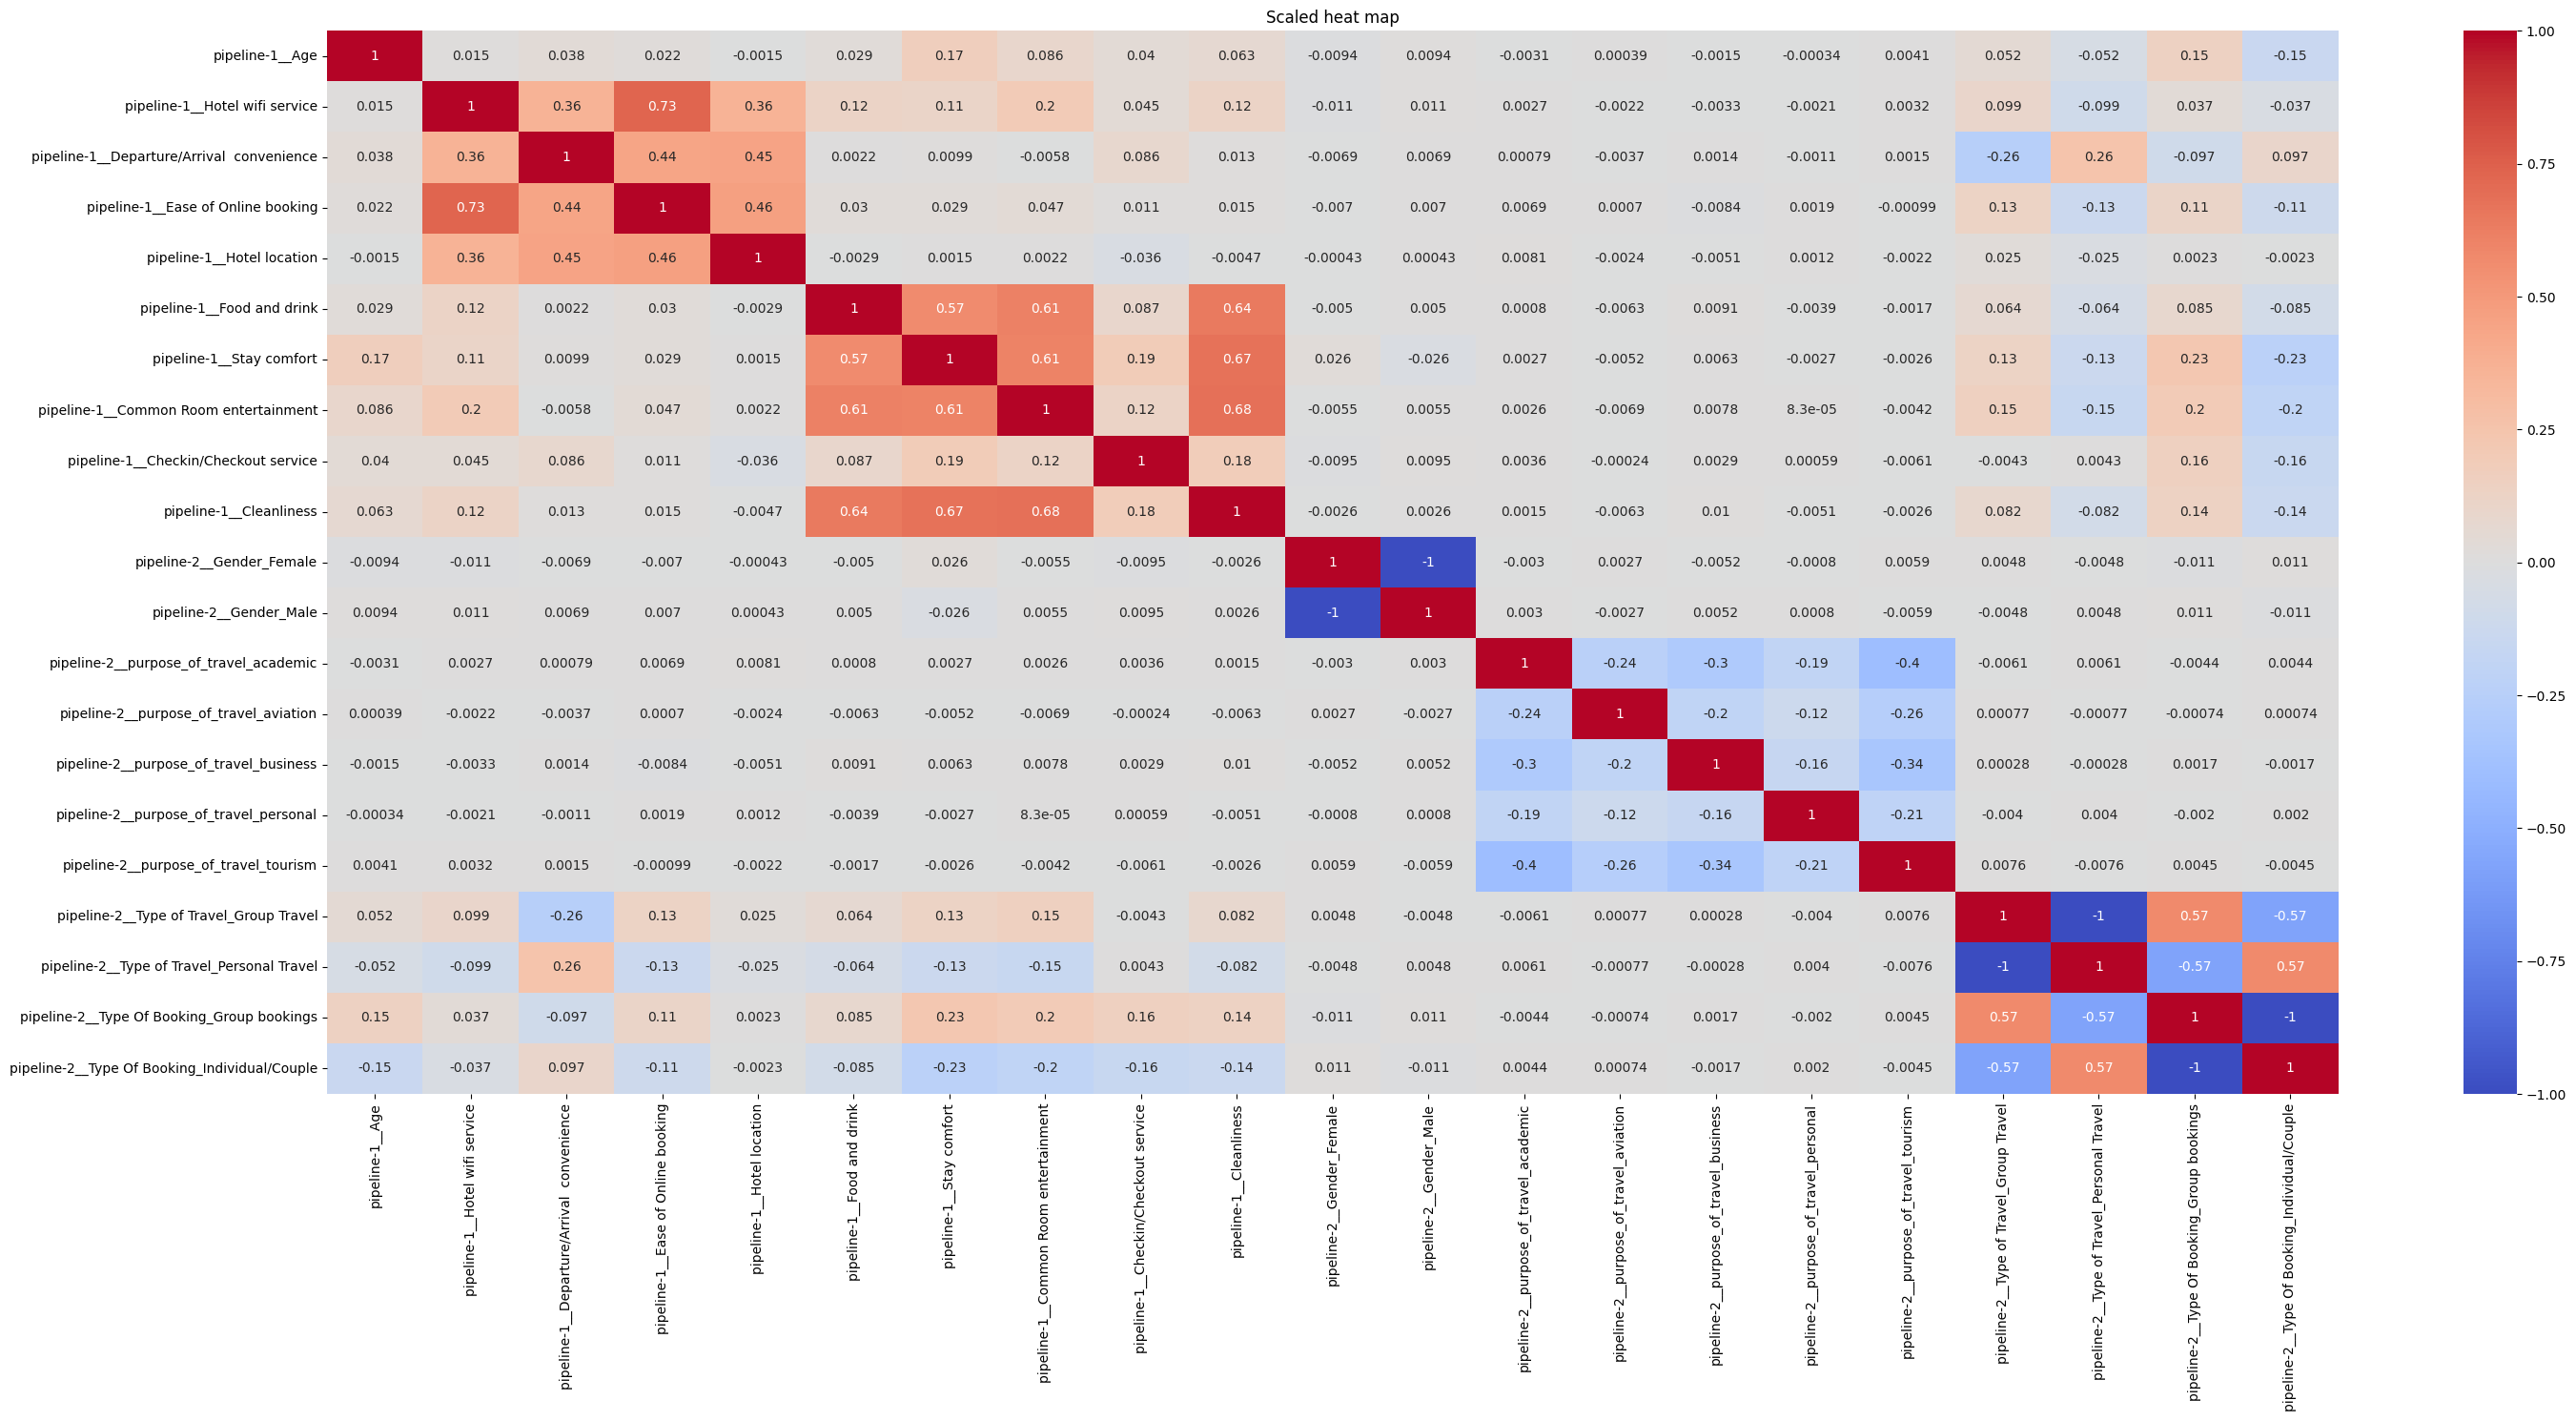

In [27]:
#Heat map od teh scaled df

plt.figure(figsize=(30,15))
plt.title("Scaled heat map")
corr_matrix = X_train_df.corr()
sns.heatmap(corr_matrix, annot= True, cmap= "coolwarm")

In [28]:
#Logistic Regression

logReg = LogisticRegression()

logReg_pipe = make_pipeline(logReg)
logReg_pipe.fit(X_train_df, y_train)

predictet_LogReg_train = logReg_pipe.predict(X_train_df)
predictet_LogReg_test = logReg_pipe.predict(X_test_df)

In [29]:
#Accuracy 
print("the accuracy of the train model is:", logReg_pipe.score(X_train_df, y_train))
print("the accuracy of the test model is:", logReg_pipe.score(X_test_df, y_test))

the accuracy of the train model is: 0.8403335776619137
the accuracy of the test model is: 0.8374061320167614


Ajusatremos el Modelo L1

In [30]:
#L1 modified

#First, let's try L1 regularization.
#The default solver will not do L1 regularization, so we need to change the solver in the logistic regression model.
#We will use solver = 'liblinear'.


#create a list of cvalues ​​C and an empty list for scores

c_values_1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_1 =[]
test_score_1 =[]

for c in c_values_1:

    #we instantiate the model for each value c and then fit it in the data
    log_reg = LogisticRegression(C = c, max_iter= 1000, solver = "liblinear", penalty= "l1")
    log_reg_pipe = make_pipeline(log_reg)
    log_reg_pipe.fit(X_train_df, y_train)

    #add the scores to our score train list, test
    train_score_1.append(log_reg_pipe.score(X_train_df, y_train))
    test_score_1.append(log_reg_pipe.score(X_test_df, y_test))

{0.0001: 0.7034808944944613,
 0.001: 0.836617848400614,
 0.01: 0.8376965522963946,
 0.1: 0.8373231547940091,
 1: 0.8374061320167614,
 10: 0.8373646434053852,
 100: 0.8373646434053852,
 1000: 0.8373646434053852}

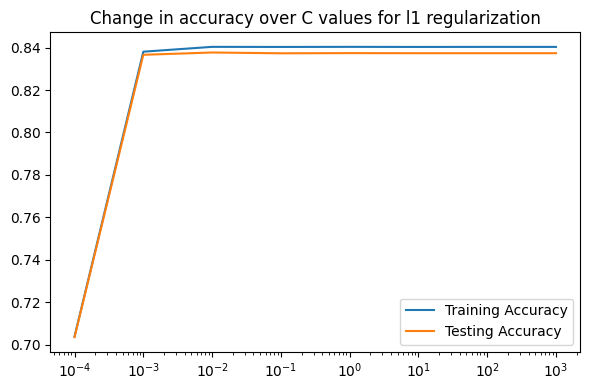

In [31]:
#plot imagen 
#How does the accuracy change when the c value changes?
fig, ax = plt.subplots(1,1)
ax.plot(c_values_1, train_score_1, label='Training Accuracy')
ax.plot(c_values_1, test_score_1, label='Testing Accuracy')
ax.set_xticks(c_values_1)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

ax.set_xscale('log')

{c:score for c, score in zip(c_values_1, test_score_1)}

#Remember that our ultimate goal is to improve accuracy on the test set.

#With a c of 0.01 it improves the accuracy

In [32]:
#We calculate with C = 0.01
log_reg_01 = LogisticRegression(C = 0.01 , max_iter= 1000, solver = "liblinear", penalty= "l1")

logReg_pipe_01 = make_pipeline(log_reg_01)
logReg_pipe_01.fit(X_train_df, y_train)

log_predict_01 = logReg_pipe_01.predict(X_test_df)

print("the accuracy of the train model is:", logReg_pipe_01.score(X_train_df, y_train))
print("the accuracy of the test model is:", logReg_pipe_01.score(X_test_df, y_test))

the accuracy of the train model is: 0.8403612375012102
the accuracy of the test model is: 0.8376965522963946


              precision    recall  f1-score   support

           0       0.86      0.85      0.85     13335
           1       0.81      0.83      0.82     10768

    accuracy                           0.84     24103
   macro avg       0.84      0.84      0.84     24103
weighted avg       0.84      0.84      0.84     24103



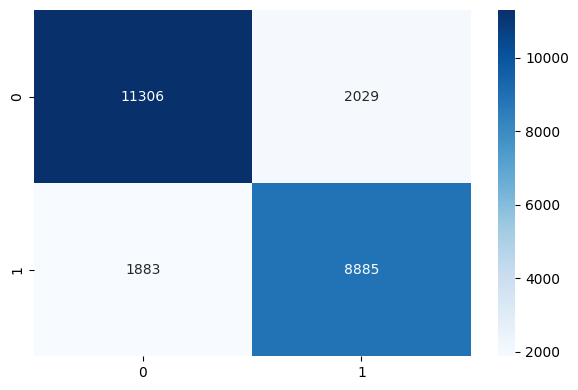

In [33]:
#Confusion Matrix
cm = confusion_matrix(y_test, log_predict_01)
sns.heatmap(cm,annot= True, cmap = "Blues", fmt= "d")

class_report_test = classification_report(y_test, log_predict_01)
print(class_report_test)


## LogisticRegression

The model classifies 13,335 samples as "neutral or dissatisfied" (0) and of those samples, 11,306 (85%) actually belong to that category (true negatives) and 2,092 (15%) were incorrectly classified as "satisfied" (false positives).

On the other hand, it classifies 10,768 samples as "satisfied" (1) and of those samples, 8,885 (83%) really belong to that category (true positives) and 1,883 (17%) were incorrectly classified as "neutral or dissatisfied" (false negatives).

The accuracy for the "satisfied" category is 81%, which means that of all the model samples classified as "satisfied", 81% actually are. The recall (also known as sensitivity) is 83%, which means that it correctly identifies 83% of all samples that are actually "satisfied". The f1-score is a measure that combines precision and recall, and in this case it is 82%.

In general, the results of the model seem to be quite good, with quite high precision, recall and f1-score for both categories.

The false positive rate is slightly higher than the false negative rate, which means that the model is better at identifying category "0" than category "1". It is better at identifying the "neutral or dissatisfied" category.



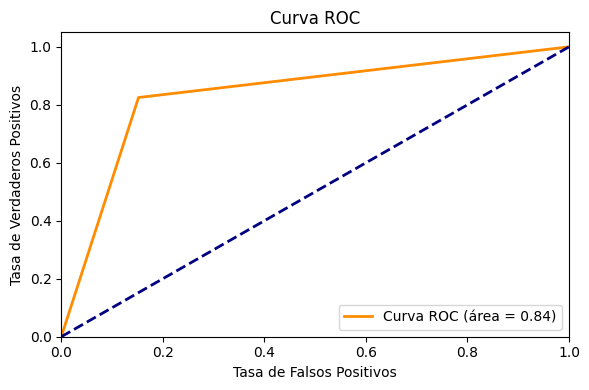

In [34]:
# Calculate the ROC curve and area under the curve (AUC)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, log_predict_01)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


#The area under the curve is 0.84. Good metric. discriminate class well

In [35]:
#Decision Tree (Classification)
dec_tree = DecisionTreeClassifier(random_state= 42)
dec_tree.fit(X_train_df, y_train)

#we evaluate the accuracy
dec_tree_r2_train = dec_tree.score(X_train_df, y_train)
dec_tree_r2_test = dec_tree.score(X_test_df, y_test)

print("the accuracy of the train model is:",dec_tree_r2_train)
print("the accuracy of the test model is:",dec_tree_r2_test)

the accuracy of the train model is: 0.9979946616510158
the accuracy of the test model is: 0.9208397294942539


In [36]:
#how deep
dec_tree.get_depth()

40

In [37]:
#search for the best accuracy

max_depth_range_dc = list(range(2, 40))# we evaluate between 2 and 40

r2_dc = []#List to store the score for each max_depth value:
for depth in max_depth_range_dc:
    descision_tree_regrecion = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    descision_tree_regrecion.fit(X_train_df, y_train)
    score = descision_tree_regrecion.score(X_test_df, y_test)
    r2_dc.append(score)

#We look for the highest r2
for i in range(len(r2_dc)):
    if (r2_dc[i]==max(r2_dc)):
        break
print("Deep ",max_depth_range_dc[i])

Deep  16


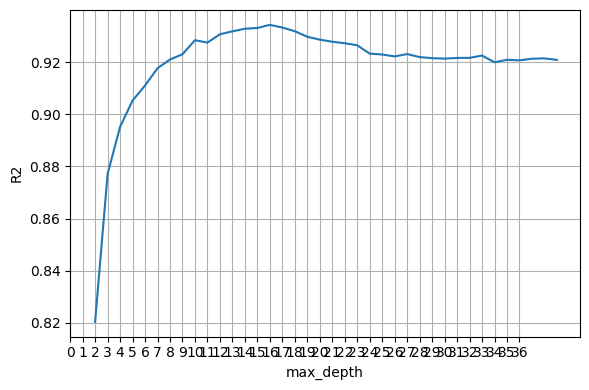

In [38]:
#Visualize the r2 vs the depth

plt.plot(max_depth_range_dc, r2_dc)
plt.xlabel('max_depth')
plt.xticks(np.arange(0, 37, 1))#rango del eje x
plt.grid(True)#Cuadriculado
plt.ylabel('R2');

In [39]:
#We evaluate with depth 16
dec_tree_16 = DecisionTreeClassifier(max_depth= 16, random_state= 42)
dec_tree_16.fit(X_train_df, y_train)

y_predict_16 = dec_tree_16.predict(X_test_df)

dec_tree_r2_train_16 = dec_tree_16.score(X_train_df, y_train)
dec_tree_r2_test_16 = dec_tree_16.score(X_test_df, y_test)

print("the accuracy of the train model is:",dec_tree_r2_train_16)
print("the accuracy of the test model is:",dec_tree_r2_test_16)

the accuracy of the train model is: 0.9650656229687306
the accuracy of the test model is: 0.9342820395801352


              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13335
           1       0.92      0.93      0.93     10768

    accuracy                           0.93     24103
   macro avg       0.93      0.93      0.93     24103
weighted avg       0.93      0.93      0.93     24103



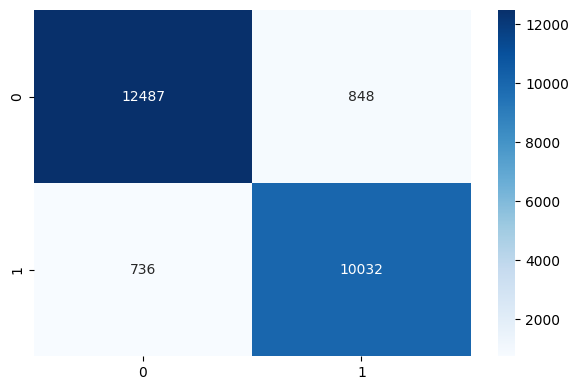

In [40]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_predict_16)

sns.heatmap(cm,annot= True, cmap = "Blues",fmt= "d")

class_report_test = classification_report(y_test, y_predict_16)
print(class_report_test)

## DecisionTreeClassifier

The confusion matrix shows high precision for both classes, which means that the model is able to accurately predict both cases of satisfaction and non-satisfaction. The precision for the "satisfied" class is 0.94 and the precision for the "not satisfied" class is 0.92. The rate of true positives (recall) for the "satisfied" class is 0.94 and for the "not satisfied" class it is 0.93. Furthermore, the F1-score measure for both classes is high, indicating that the model has a good balance between accuracy and recall. In general, high precision and high recall, together with a high F1-score, suggest that the model is capable of accurately classifying both satisfied and dissatisfied cases.


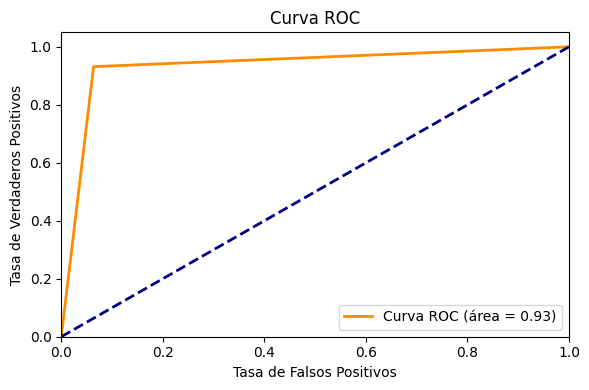

In [41]:
# Calculate the ROC curve and area under the curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_predict_16)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


#The area under the curve is 0.93. Good metric. discriminate class well


In [42]:
#Random Forest

rfc = RandomForestClassifier( random_state= 42)
rfc.fit(X_train_df, y_train)

rfc_r2_train = rfc.score(X_train_df, y_train)
rfc_r2_test = rfc.score(X_test_df, y_test)

print("the accuracy of the train model is:",rfc_r2_train)
print("the accuracy of the train test is:",rfc_r2_test)


the accuracy of the train model is: 0.9979808317313676
the accuracy of the train test is: 0.9416255237937187


In [43]:
#We look for the best Accuracy

max_estimators_range_2 = list(range(2, 200))# will try every value between 2 and 200

r2_2 = []#List to store the score for each value of n_estimators:
for estimator in max_estimators_range_2:
    baggin_regresor_2= RandomForestClassifier(n_estimators = estimator, 
                             random_state = 42)
    baggin_regresor_2.fit(X_train_df, y_train)
    score =  baggin_regresor_2.score(X_test_df, y_test)
    r2_2.append(score)

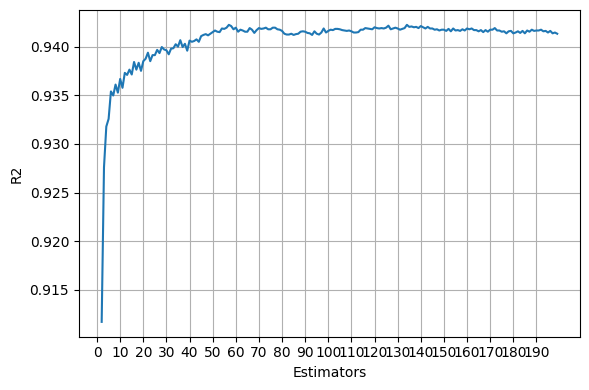

In [44]:
#Visualize the r2 vs the n_estimators

plt.plot(max_estimators_range_2, r2_2)
plt.xlabel('Estimators')
plt.xticks(np.arange(0, 200, 10))#x-axis range
plt.grid(True)#gridded
plt.ylabel('R2');

In [45]:
#We look for the highest r2
for i in range(len(r2_2)):
    if (r2_2[i]==max(r2_2)):
        break
print("Estimadores ",max_estimators_range_2[i])

Estimadores  57


In [46]:
#We evaluate r2 with 158 estimators
rfc_57 = RandomForestClassifier(n_estimators= 57, random_state= 42)
rfc_57.fit(X_train_df, y_train)

rfc_r2_train_57 = rfc_57.score(X_train_df, y_train)
rfc_r2_test_57 = rfc_57.score(X_test_df, y_test)

y_predict_57 = rfc_57.predict(X_test_df)

print(rfc_r2_train_57)
print(rfc_r2_test_57)

0.9978840222938304
0.9422478529643613


              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13335
           1       0.94      0.93      0.93     10768

    accuracy                           0.94     24103
   macro avg       0.94      0.94      0.94     24103
weighted avg       0.94      0.94      0.94     24103



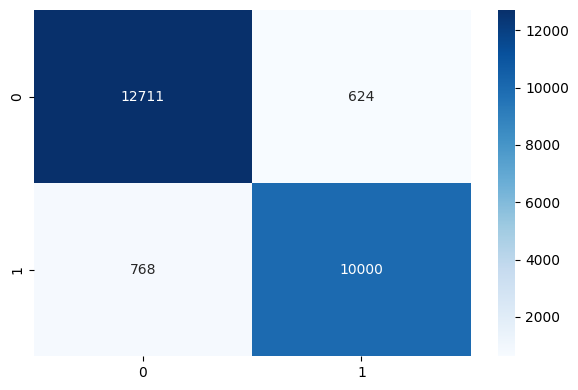

In [47]:
cm = confusion_matrix(y_test, y_predict_57)
sns.heatmap(cm,annot= True, cmap = "Blues", fmt= "d")

class_report_test = classification_report(y_test, y_predict_57)
print(class_report_test)

## RandomForestClassifier

The model correctly classifies 94% of the samples in the "not satisfied" category (0) and 95% of the samples in the "satisfied" category (1).

The recall, also known as sensitivity, is 96% for the "not satisfied" category and 93% for the "satisfied" category. This means that the model is able to correctly identify 96% of all samples that are truly "unsatisfied" and 93% of all samples that are truly "satisfied".

The F1-score, which is a measure that combines precision and recall, is 95% for the "not satisfied" category and 94% for the "satisfied" category, which suggests that the model has a good balance between precision and recall.


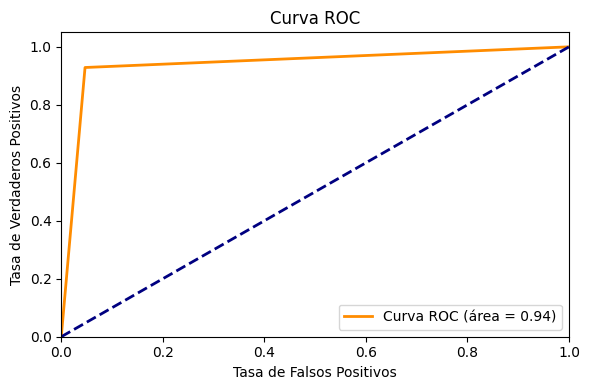

In [48]:
# Calculate the ROC curve and area under the curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_predict_57)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


#The area under the curve is 0.94. Good metric. discriminate class well


## Deep lerning


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_df.shape[1]
input_shape

21

In [79]:
model = Sequential()

### Model Clean

In [80]:
# First hidden layer
model.add(Dense(21, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

In [81]:
history = model.fit(X_train_df, y_train,
                    validation_data = (X_test_df, y_test), 
                    epochs=10)

Epoch 1/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.2858 - val_loss: 0.2290
Epoch 2/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.2098 - val_loss: 0.1899
Epoch 3/10
2260/2260 [==============================] - 3s 2ms/step - loss: 0.1812 - val_loss: 0.1702
Epoch 4/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1651 - val_loss: 0.1587
Epoch 5/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1556 - val_loss: 0.1527
Epoch 6/10
2260/2260 [==============================] - 3s 1ms/step - loss: 0.1505 - val_loss: 0.1502
Epoch 7/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1475 - val_loss: 0.1468
Epoch 8/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1456 - val_loss: 0.1444
Epoch 9/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1441 - val_loss: 0.1438
Epoch 10/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.143

In [82]:
loss = model.evaluate(X_test_df, y_test)


754/754 [==============================] - 1s 1ms/step - loss: 0.1438


In [83]:
y_pred = model.predict(X_test_df)
y_pred_classes = (y_pred > 0.5).astype(int)

Accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Loss: {loss}, Accuracy: {Accuracy}')

754/754 [==============================] - 1s 1ms/step
Loss: 0.14379434287548065, Accuracy: 0.939841513504543


In [90]:
#predictions
y_pred = model.predict(X_test_df)
y_pred_clases = np.round(y_pred,)#


754/754 [==============================] - 1s 1ms/step


              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13335
           1       0.94      0.92      0.93     10768

    accuracy                           0.94     24103
   macro avg       0.94      0.94      0.94     24103
weighted avg       0.94      0.94      0.94     24103



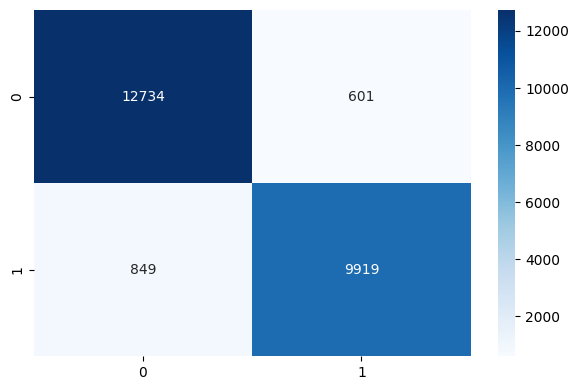

In [89]:
#Confusion Matrix

cm_2 = confusion_matrix(y_test, y_pred_clases)

sns.heatmap(cm_2,annot= True, cmap = "Blues",fmt= "d")

class_report_test = classification_report(y_test, y_pred_clases)
print(class_report_test)

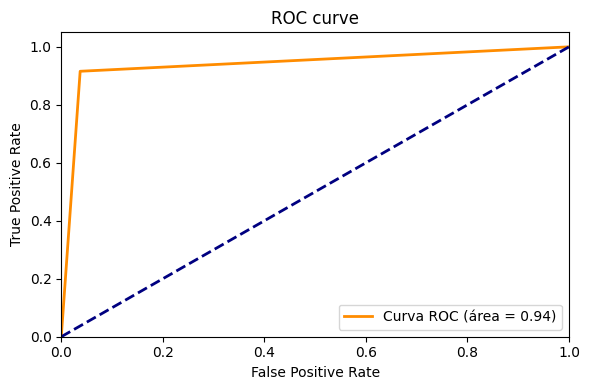

In [92]:
# Calculate the ROC curve and area under the curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_clases)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


#The area under the curve is 0.94. Good metric. discriminate class well

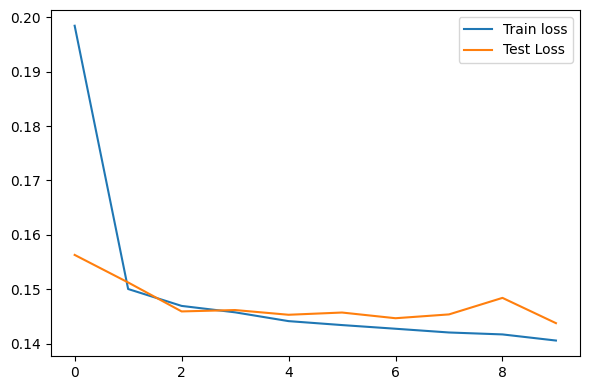

In [93]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

### Model with Eraly stopping

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
# First hidden layer
model.add(Dense(21, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(15, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

early_stopping = EarlyStopping(patience = 5)

history = model.fit(X_train_df, y_train,
                    validation_data = (X_test_df, y_test), 
                    epochs=10)

Epoch 1/10
2260/2260 [==============================] - 5s 2ms/step - loss: 0.1984 - val_loss: 0.1563
Epoch 2/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1501 - val_loss: 0.1513
Epoch 3/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1470 - val_loss: 0.1460
Epoch 4/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1458 - val_loss: 0.1462
Epoch 5/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1442 - val_loss: 0.1453
Epoch 6/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1435 - val_loss: 0.1458
Epoch 7/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1428 - val_loss: 0.1447
Epoch 8/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1421 - val_loss: 0.1454
Epoch 9/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.1417 - val_loss: 0.1484
Epoch 10/10
2260/2260 [==============================] - 4s 2ms/step - loss: 0.140

In [98]:
#prediction
y_pred_2 = model.predict(X_test_df)
y_pred_classes_2 = (y_pred > 0.5).astype(int)

Accuracy = accuracy_score(y_test, y_pred_classes_2)
print(f'Loss: {loss}, Accuracy: {Accuracy}')

754/754 [==============================] - 1s 1ms/step
Loss: 0.14379434287548065, Accuracy: 0.9417499896278472


              precision    recall  f1-score   support

           0       0.93      0.96      0.95     13335
           1       0.95      0.92      0.93     10768

    accuracy                           0.94     24103
   macro avg       0.94      0.94      0.94     24103
weighted avg       0.94      0.94      0.94     24103



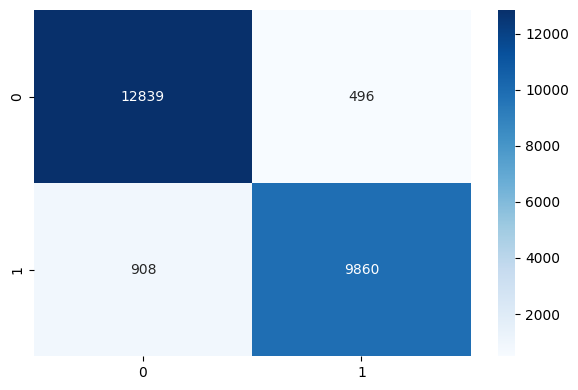

In [100]:
#Confusion Matrix

cm_2 = confusion_matrix(y_test, y_pred_clases)

sns.heatmap(cm_2,annot= True, cmap = "Blues",fmt= "d")

class_report_test = classification_report(y_test, y_pred_classes_2)
print(class_report_test)

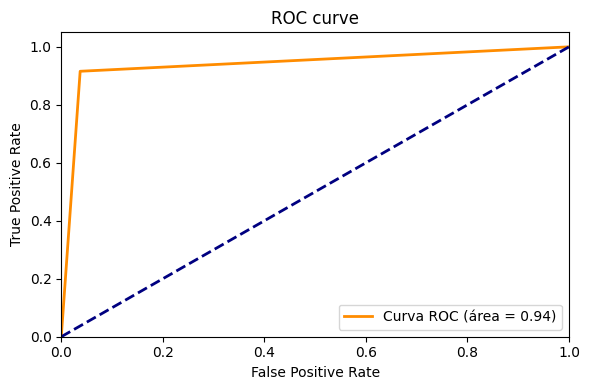

In [101]:
# Calculate the ROC curve and area under the curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_clases)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


#The area under the curve is 0.94. Good metric. discriminate class well

The precision of the model for variable 1 is 95%, which means that the model is predicting customer satisfaction well.
the recall shows an increase for variable 0 compared to the other models, giving 96% and maintaining 92% for variable 1. This increase in the recall of variable 0 is explained by the decrease in false positives that were to fall to the true negatives. The model delivers a precision of 94%, which is comparable to the randomForest model.


## Conclusion

The 4 models were evaluated with a confusion matrix and ROC curve. As it is a balanced dependent variable, we focused more on accuracy. The four models delivered very high accuracy values, with the random forest surpassing the others with 95%, and its ROC curve delivered an area under the curve of 94%, higher than the other models, without comparing with the model of neural networks

We created a model of neural networks to be able to do a benchmarking.
The model delivered very satisfactory metrics but close to the Randomforest model.

It is important to mention 3 points about the neural network model:

1. The modeling is much faster to generate the results compared to the random forest.
2. We can actually see if the model is Overfitted, in this case it stayed at 14% but with random forest we can't see that.
3. When classifying the data in a confusion matrix, it was the only model that better predicted True Negatives, increasing recall.

The random forest model works better in this case since the correlation between the columns is very low. In general, it is recommended to use Random Forest when there are many variables and you want to reduce the influence of irrelevant or redundant variables, as the algorithm automatically selects the most important variables. 

As can be seen in the scaled heatmap, there is not much correlation, and therefore we recommend using the random forest model due to its high accuracy.